# Advanced python: Data basics 

Author: Jiayi Zhang (jz6521)


In the following notebook, we will practice loading data from folder (using `numpy`, though you will be able to find ways to read all kinds of files on the internet). We will make sense of the fields/items of the dataset and do some basic visualizations.

The example data is adapted from a published dataset by [Daie et al. 2021](https://doi.org/10.1038/s41593-020-00776-3)-session 74. Data were obtained from 2-photon imaging of the (left) Anterolateral Motor cortex (ALM) using GCaM6s indicators.

**Key points of practice/pay attention to**
1. importing packages
2. path, file I/O
3. accessing dictionaries
4. for-loop
5. function definition
6. `numpy` operations: averaging, etc.
7. `matplotlib` basics: plotting, creating legend, etc.

In [1]:
# import packages
import numpy as np # math/numerical
import matplotlib.pyplot as plt # plotting

In [2]:
# specify the path to the data file
# Note: this is a relative path
data_path = "../datasets/neuron.npz"

# load data: read data in with numpy and cast it into a dictionary
data = dict(np.load(data_path, allow_pickle=True))

### Exercises 1: What's in the dataset?
1. Print out keys and reference the `data specification` document as needed.
    > *Hint* You can now access the data file as a dictionary 
2. What is the sampling rate of this data? (What even is a *sampling rate*?)
3. With *1 line of code*, for the neural activity array (`y`)
   1. How many trials are recorded?
   2. How many time points are recorded (for a single trial)?
   > What is an "axis" for a numpy array? Why is this notion important?
4. With *1 line of code*, how long (in seconds) is a trial?
5. How many types of trials are there? What are they? How many trials in total?

In [6]:
# put your code here
# print out the keys
print(list(data.keys()))

# sampling rate of the data
dt = data['dt']
print(f"Sampling rate: {1/dt} Hz")

# shape of y
y = data['y']
n_trials, n_times = y.shape
# n_trials = y.shape[0]
# n_times = y.shape[1]
print(f"Number of trials: {n_trials}, Number of time points: {n_times}")

# how long is a trial
trial_length = n_times * dt
print(f"Trial length: {trial_length} seconds")

# how many left and right trials
nL = data["nL"]
nR = data["nR"]
print(f"Number of left trials: {nL}, Number of right trials: {nR}")

['dt', 'nR', 'nL', 'y', 'stim_time']
Sampling rate: 24.1342 Hz
Number of trials: 159, Number of time points: 157
Trial length: 6.505291246446951 seconds
Number of left trials: 69, Number of right trials: 90


## Exercises 2: Visualizing neuron activity
1. In *plot 0*, visualize the activity of neuron 0 on the 8th, 50th, 104th, 153th trials (0-indexing). Plot them with different colors and create a legend.
   > Hint: You can even write a little function that plots a trial of activity so that your notebook will be tidy (and short). 
2. In *plot 1* (new plot), visualize the average activity of neuron 0 across all trials.
3. In *plot 1*, show where the important time points are in the trial. What do you think this neuron is selective for? (Guess/intuition)
4. In *plot 2*, similar to *plot 1* but now visualize the average activity of neuron 0 across right and left, separately (2 lines), and create a proper legend. 
5. Extra problem: What are the pros and cons of taking an average?
   
*Note*: you can put "neural activity" as y-axis label and "time" as x-axis label.
Bonus if you can change the x-axis from time point into seconds. 

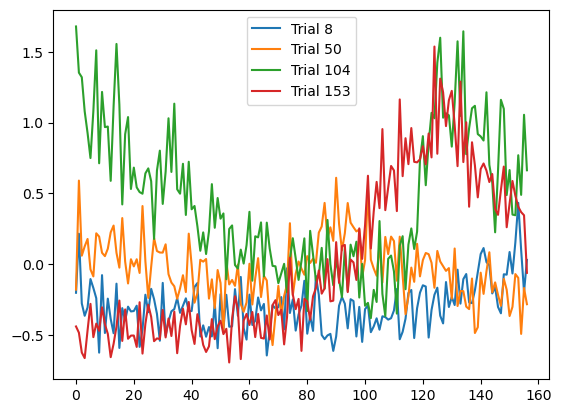

In [8]:
# put your code here for plot 0
toi = [8, 50, 104, 153]

for tr in toi:
    neural_act = y[tr, :]
    plt.plot(neural_act, label=f"Trial {tr}")

plt.legend()

Text(0.5, 1.0, 'Average Neural Activity')

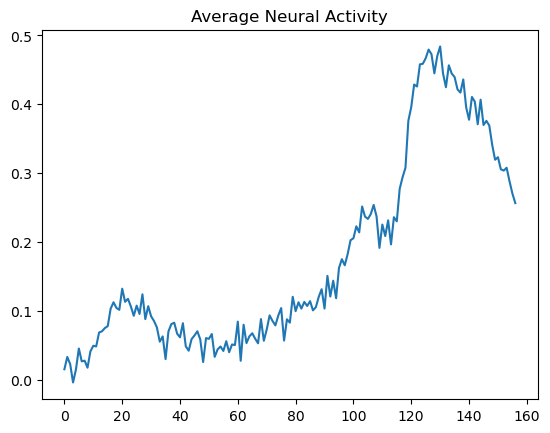

In [12]:
# put your code here for plot 1
y_avg = np.mean(y, axis=0)

plt.plot(y_avg)
plt.title("Average Neural Activity")

In [ ]:
# put your code here for plot 2

### Excises 3: A (slightly) bigger dataset
Now load a slightly bigger data file at `../datasets/many_neurons.npz`. 

1. With *1 line of code*, for the neural activity array (`y`)
   1. How many neurons are recorded (in this file)?
   2. How many time points are recorded?

> If previously we can call `y` a matrix, with trial and time as it's rows and columns, what is `y` now (now that it has 3 axes)?

2. How do you
   1. get the activity of neuron 0 on trial 2?
   2. get the activity of neurons 4, 5, 10 on trial 3?
   3. get the activity of neuron 3, 5 on the first 10 time points of trial 4?

In [ ]:
# read in the new file


### Challenge Exercise
Recreate the plot you made in **Exercises 2.3** (average activity for correct and incorrect trials) for each of the neurons in the file. Save them with [`savefig` function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html). 
>*Hint* loop over `y` to create one plot at a time.

When you are done with plotting:
1. Are these neurons different? In what sense?
2. Suppose we create a plot, showing the neural activity in a trial averaged across all the neurons, what would this plot tell you? Do we want this plot? Why or why not?

In [ ]:
# put your code here